# Cassandra Setup and Data Visualization

### Imports

In [1]:
from cassandra.cluster import Cluster
import matplotlib.pyplot as plt
import matplotlib.dates
import pandas as pd

### Section 1: Cassandra Setup

In [2]:
cluster = Cluster(['0.0.0.0'],port=9042)
session = cluster.connect()
session.execute("CREATE KEYSPACE IF NOT EXISTS saCity WITH REPLICATION = { 'class' : 'SimpleStrategy', 'replication_factor' : 1 };")
session.execute('USE sacity')
#session.execute('DROP TABLE senCity')
session.execute('create table IF NOT EXISTS senCity (windowstart timestamp, windowend timestamp, key_str text, sentiment float, primary key (windowstart, key_str))')

### Section 2: Data Visualization

In [3]:
rows = session.execute("Select * from senCity")
df = pd.DataFrame(rows)

print("dataframe shape:\n",df.shape)
print("dataframe:\n",df)
print("sentiment values:\n",df.describe())


dataframe shape:
 (99, 4)
dataframe:
            windowstart key_str  sentiment           windowend
0  2022-10-30 19:33:50     LON   0.152381 2022-10-30 19:33:55
1  2022-10-30 19:31:55     CHI   0.033333 2022-10-30 19:32:00
2  2022-10-30 19:31:55     LON   0.125265 2022-10-30 19:32:00
3  2022-10-30 19:31:45     CHI   0.000000 2022-10-30 19:31:50
4  2022-10-30 19:31:45     LON   0.067330 2022-10-30 19:31:50
..                 ...     ...        ...                 ...
94 2022-10-30 19:32:10     LON  -0.148359 2022-10-30 19:32:15
95 2022-10-30 19:33:05     CHI   0.162500 2022-10-30 19:33:10
96 2022-10-30 19:33:05     LON   0.000000 2022-10-30 19:33:10
97 2022-10-30 19:33:35     CHI  -0.435000 2022-10-30 19:33:40
98 2022-10-30 19:33:35     LON   0.218750 2022-10-30 19:33:40

[99 rows x 4 columns]
sentiment values:
        sentiment
count  99.000000
mean    0.034752
std     0.210684
min    -0.800000
25%     0.000000
50%     0.033333
75%     0.136257
max     0.529444


In [4]:
for i,data in df.groupby("key_str"):
    print(i,data)

CHI            windowstart key_str  sentiment           windowend
1  2022-10-30 19:31:55     CHI   0.033333 2022-10-30 19:32:00
3  2022-10-30 19:31:45     CHI   0.000000 2022-10-30 19:31:50
5  2022-10-30 19:33:55     CHI   0.000000 2022-10-30 19:34:00
7  2022-10-30 19:34:30     CHI  -0.450000 2022-10-30 19:34:35
9  2022-10-30 19:31:20     CHI   0.086111 2022-10-30 19:31:25
11 2022-10-30 19:35:15     CHI  -0.090625 2022-10-30 19:35:20
13 2022-10-30 19:32:55     CHI   0.162963 2022-10-30 19:33:00
15 2022-10-30 19:31:15     CHI   0.529444 2022-10-30 19:31:20
18 2022-10-30 19:32:30     CHI   0.033333 2022-10-30 19:32:35
20 2022-10-30 19:34:00     CHI   0.338095 2022-10-30 19:34:05
22 2022-10-30 19:34:15     CHI  -0.191667 2022-10-30 19:34:20
24 2022-10-30 19:31:30     CHI  -0.141667 2022-10-30 19:31:35
26 2022-10-30 19:33:15     CHI   0.000000 2022-10-30 19:33:20
28 2022-10-30 19:34:05     CHI  -0.025926 2022-10-30 19:34:10
30 2022-10-30 19:34:50     CHI   0.000000 2022-10-30 19:34:55
32 2

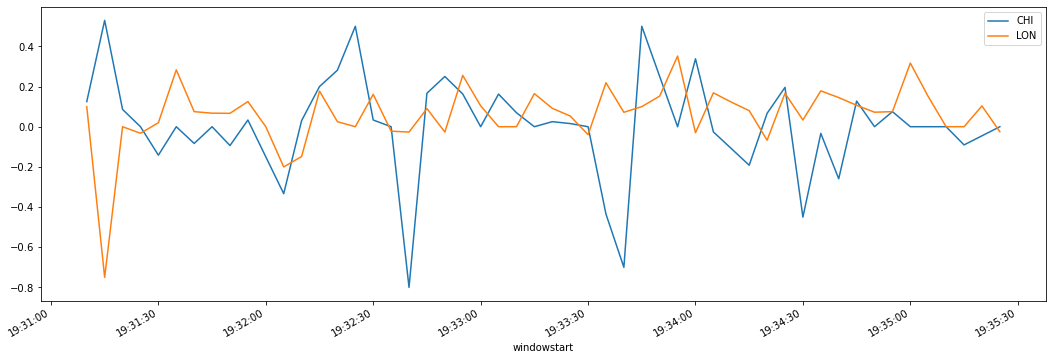

In [5]:
fig, ax = plt.subplots(figsize=(18,6))

for name, group in df.groupby('key_str'):
    group.plot(x='windowstart', y='sentiment', ax=ax, label=name)

plt.show()
